In [1]:
import torch
import os
import glob
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

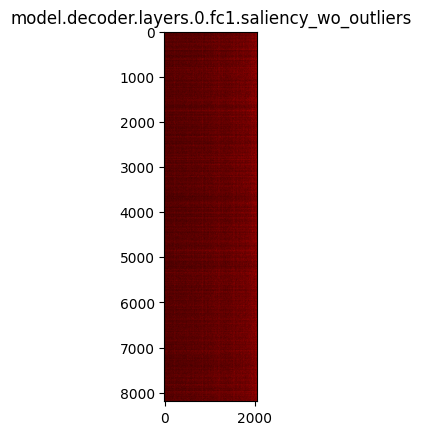

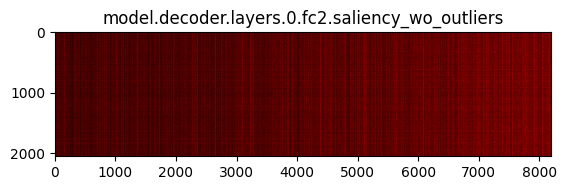

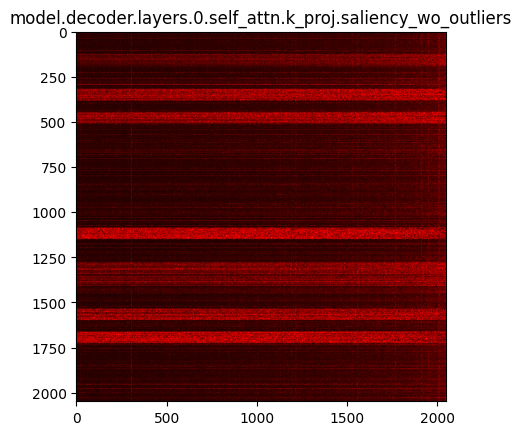

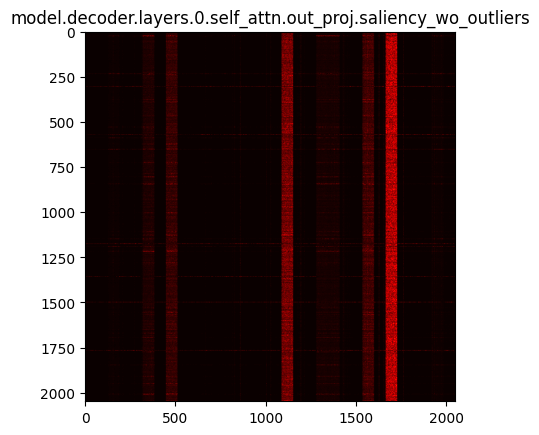

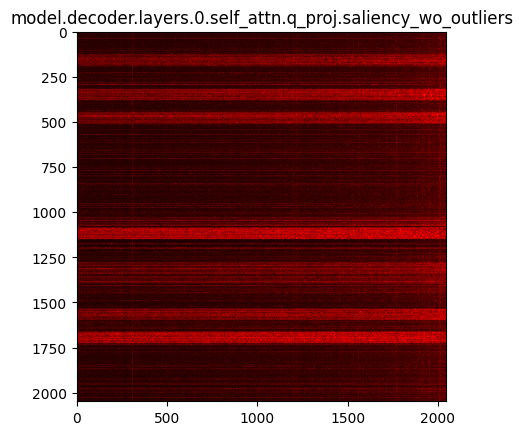

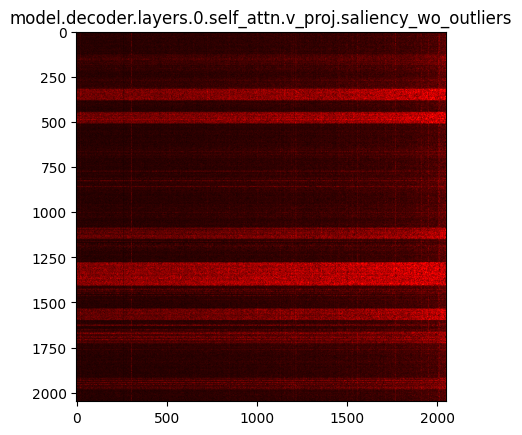

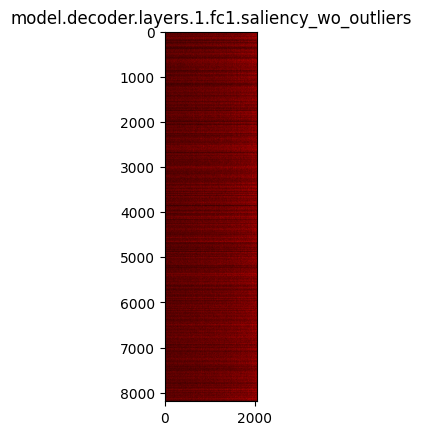

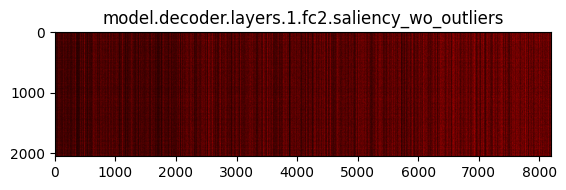

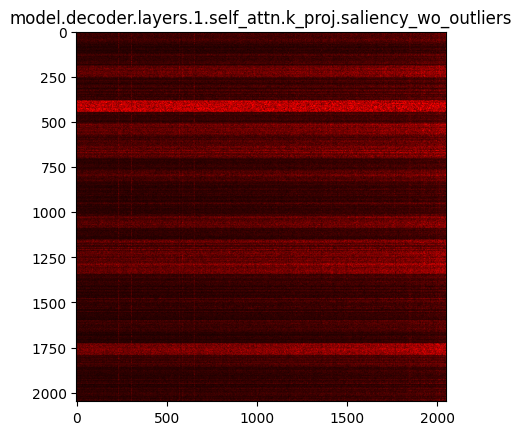

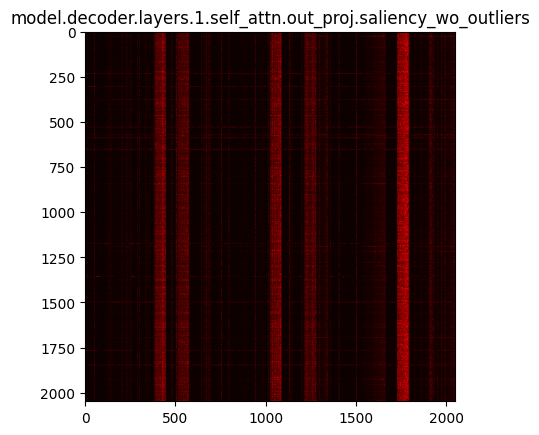

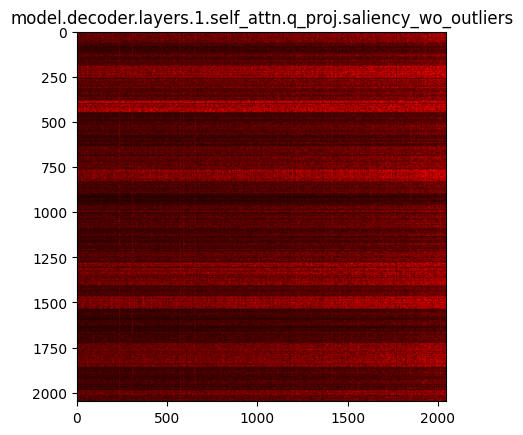

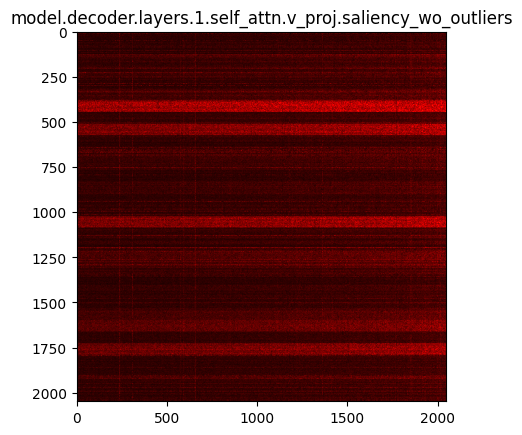

In [2]:
layer_saliencies = glob.glob("saliency-opt-1.3b/*saliency_wo_outliers*")

for layer in sorted(layer_saliencies)[:12]:
    saliency = torch.load(layer).cpu().numpy()
    
    layer_name = "-".join(layer.split(".")[3:-1])

    plt.imshow(saliency/np.max(saliency), cmap='hot')
    plt.title(os.path.basename(layer))
    plt.show()

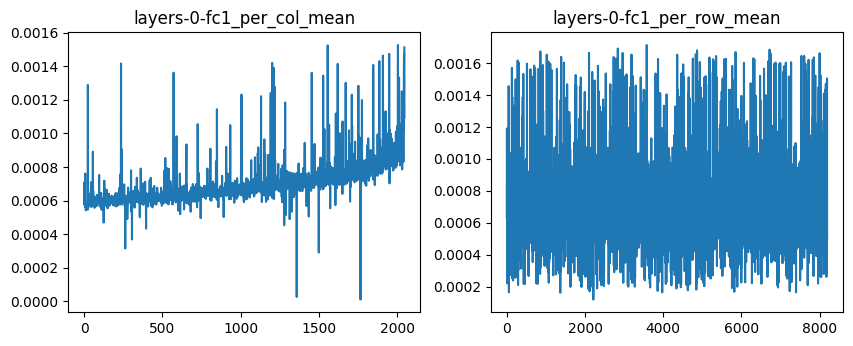

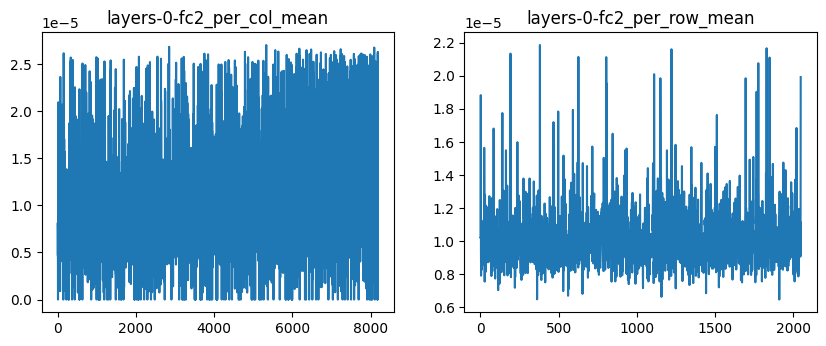

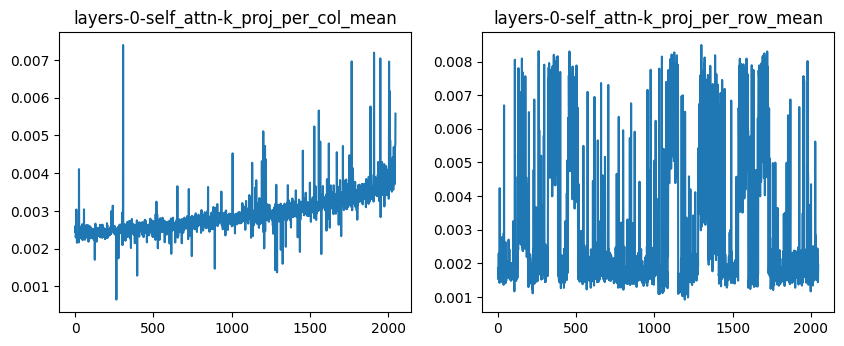

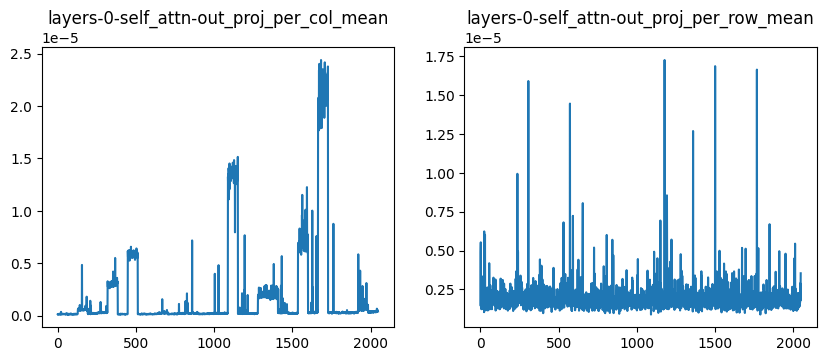

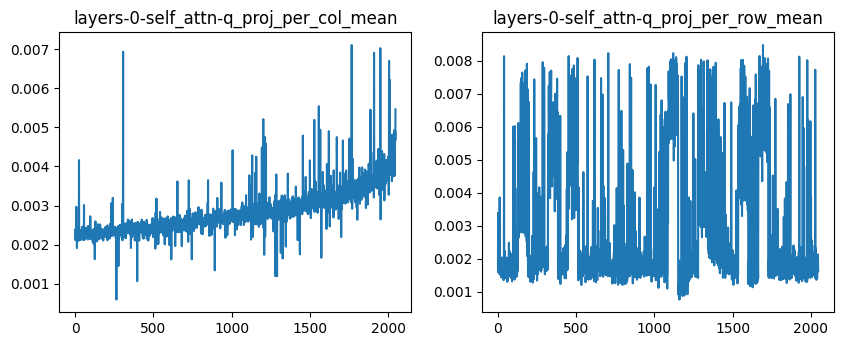

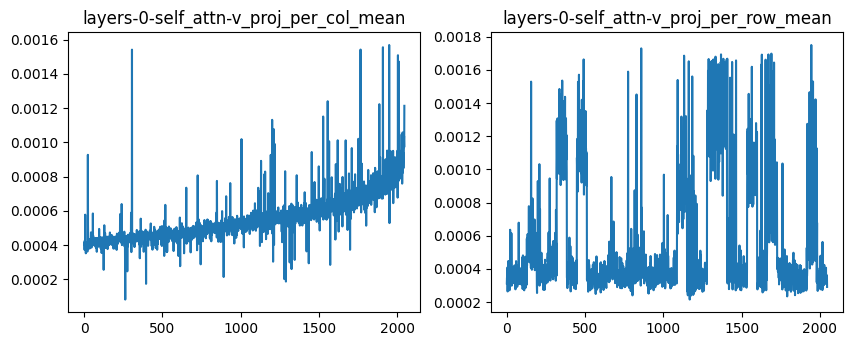

In [4]:
for layer in sorted(layer_saliencies)[:6]:
    saliency = torch.load(layer).cpu().numpy()

    # per_row_sum = np.sum(saliency, axis=1)
    per_col_mean = np.mean(saliency, axis=0)
    per_row_mean = np.mean(saliency, axis=1)
    # per_row_var = np.var(saliency, axis=1)

    layer_name = "-".join(layer.split(".")[3:-1])
    
    plt.figure(figsize=(10, 8))
    # plt.subplot(2,2,1)
    # plt.plot(per_row_sum)
    # plt.title(os.path.basename(layer_name)+"_per_row_sum")

    plt.subplot(2,2,1)
    plt.plot(per_col_mean)
    plt.title(os.path.basename(layer_name)+"_per_col_mean")

    plt.subplot(2,2,2)
    plt.plot(per_row_mean)
    plt.title(os.path.basename(layer_name)+"_per_row_mean")

    # plt.subplot(2,2,3)
    # plt.plot(per_row_var)
    # plt.title(os.path.basename(layer_name)+"_per_row_var")
    plt.show()

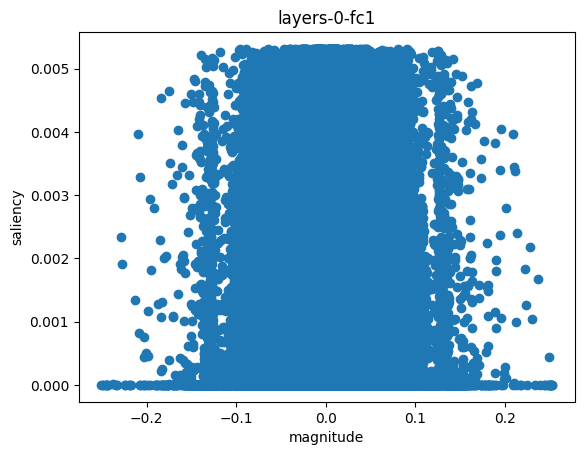

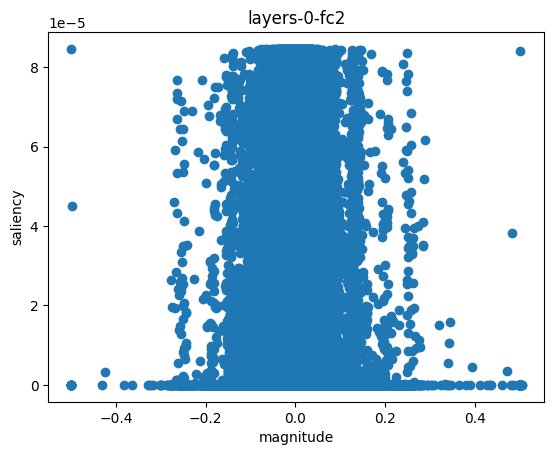

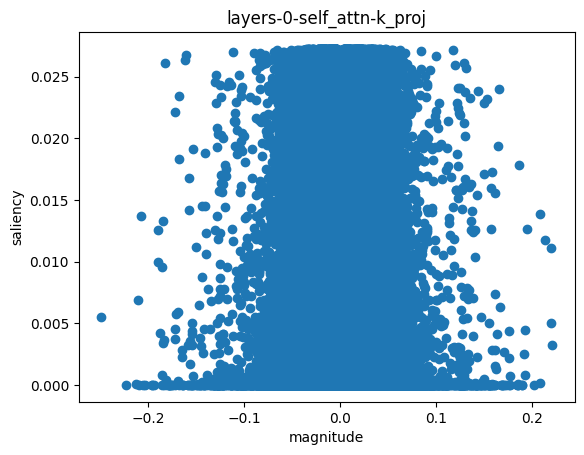

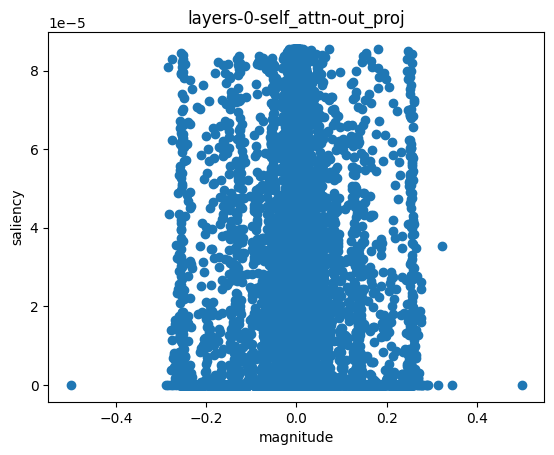

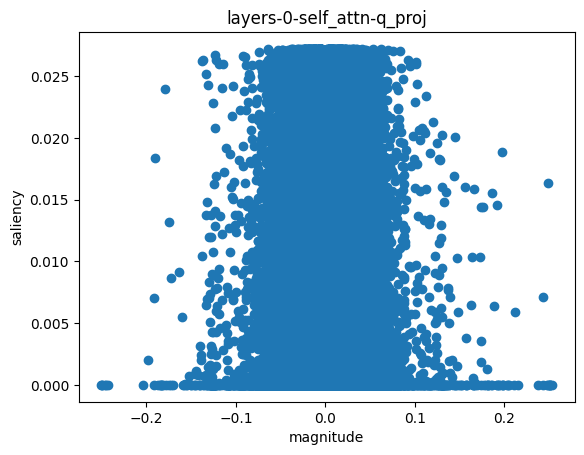

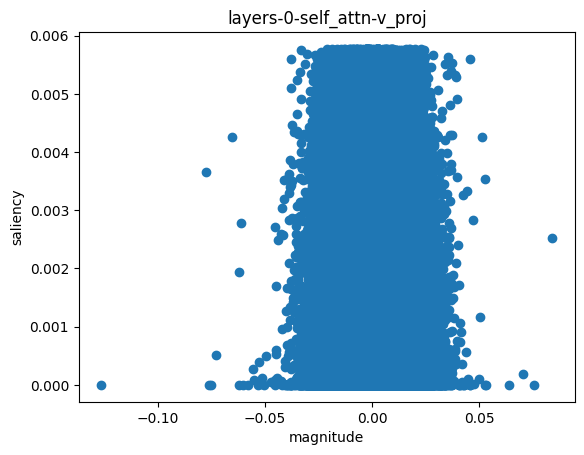

In [17]:
layer_saliencies = glob.glob("saliency-opt-1.3b/*saliency_wo_outliers*")
layer_weights = glob.glob("saliency-opt-1.3b/*weights*")

# print(sorted(layer_saliencies)[:6])
# print(sorted(layer_weights)[:6])

for layer_saliency, layer_weight in zip(sorted(layer_saliencies)[:6], sorted(layer_weights)[:6]):
    saliency = torch.load(layer_saliency).cpu().numpy()
    weight = torch.load(layer_weight).cpu().numpy()

    layer_name = "-".join(layer_saliency.split(".")[3:-1])

    plt.figure()
    plt.scatter(weight.reshape(-1), saliency.reshape(-1))
    plt.xlabel("magnitude")
    plt.ylabel("saliency")
    plt.title(os.path.basename(layer_name))
    plt.show()

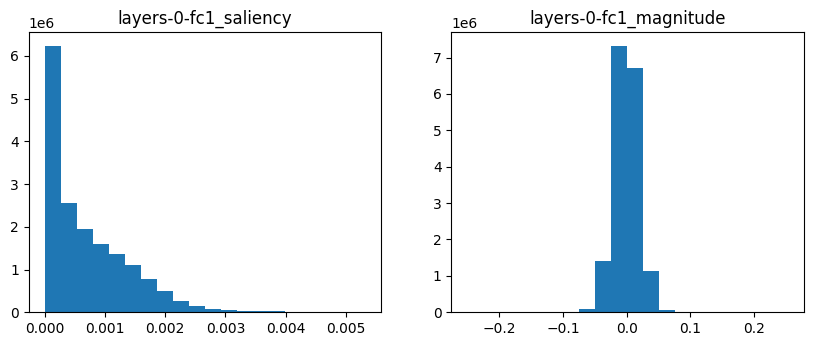

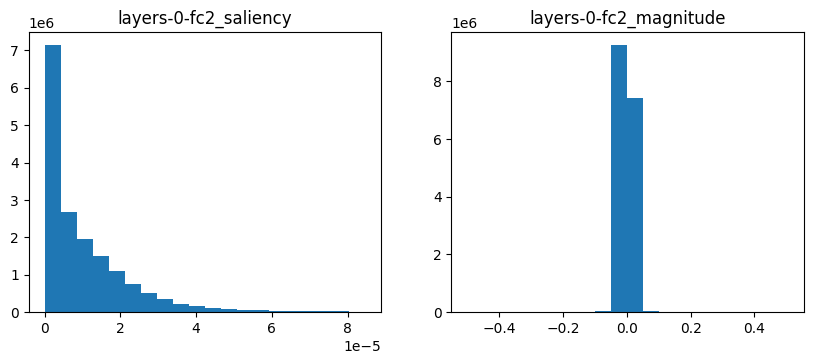

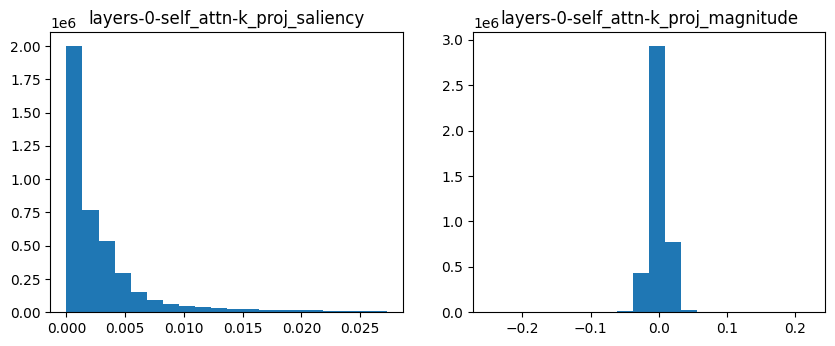

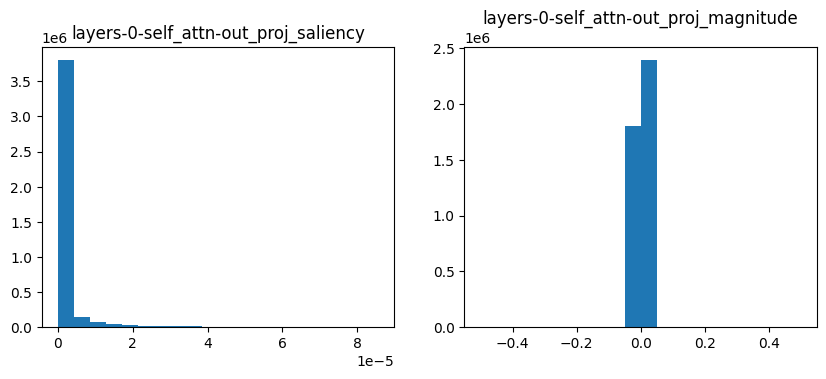

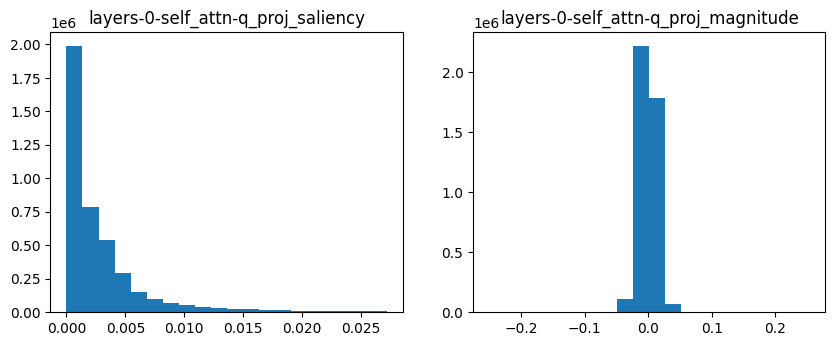

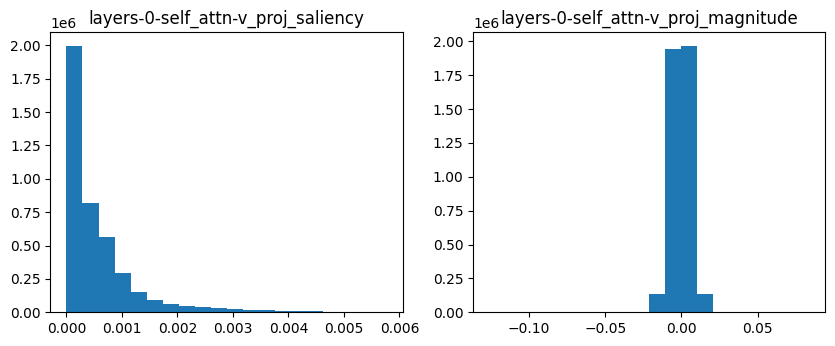

In [24]:
layer_saliencies = glob.glob("saliency-opt-1.3b/*saliency_wo_outliers*")
layer_weights = glob.glob("saliency-opt-1.3b/*weights*")

# print(sorted(layer_saliencies)[:6])
# print(sorted(layer_weights)[:6])

for layer_saliency, layer_weight in zip(sorted(layer_saliencies)[:6], sorted(layer_weights)[:6]):
    saliency = torch.load(layer_saliency).cpu().numpy()
    weight = torch.load(layer_weight).cpu().numpy()
    
    layer_name = "-".join(layer_saliency.split(".")[3:-1])

    plt.figure(figsize=(10, 8))
    
    plt.subplot(2,2,1)
    plt.hist(saliency.reshape(-1), bins=20)
    plt.title(os.path.basename(layer_name)+"_saliency")

    plt.subplot(2,2,2)
    plt.hist(weight.reshape(-1), bins=20)
    plt.title(os.path.basename(layer_name)+"_magnitude")
    
    plt.show()

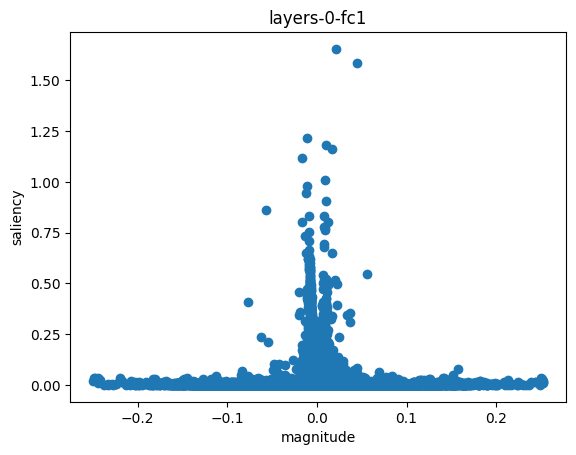

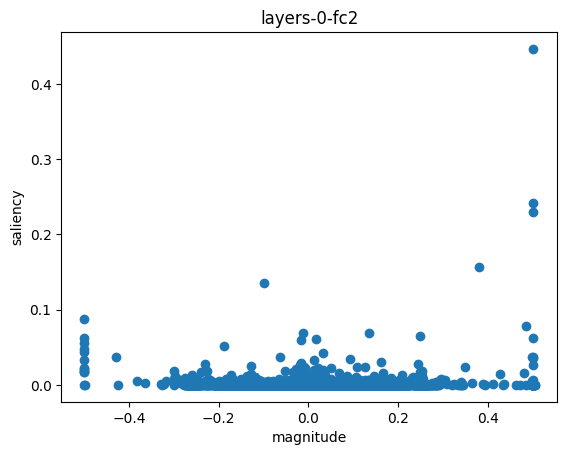

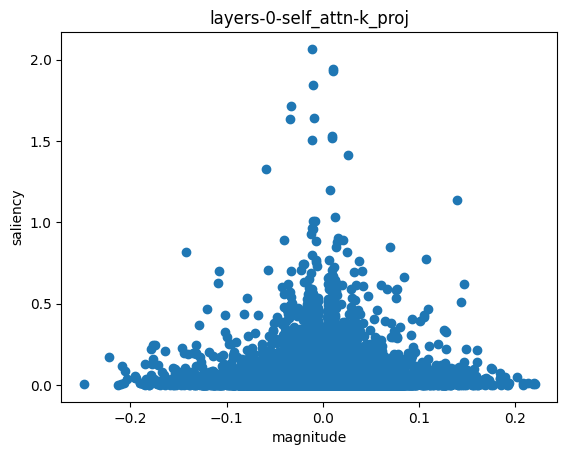

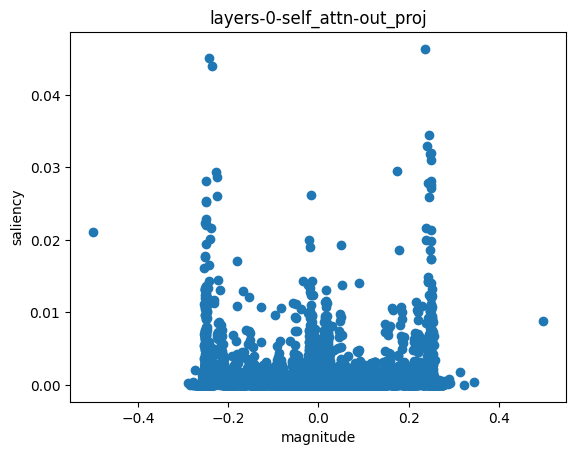

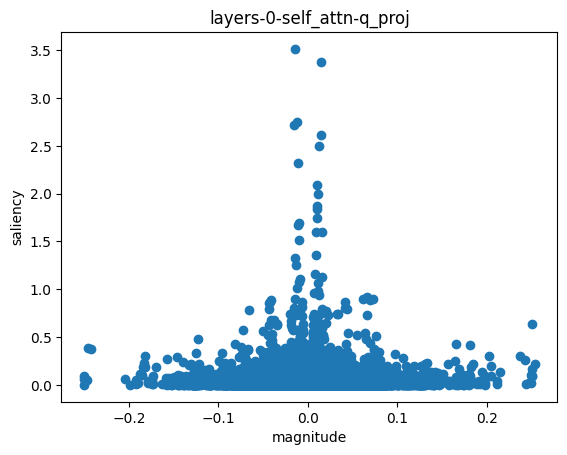

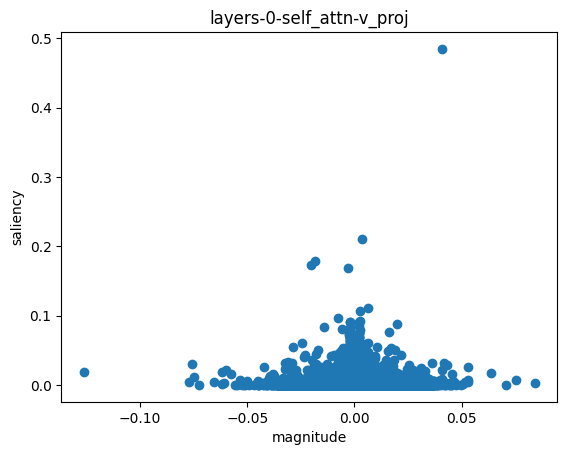

In [25]:
# This is with the outliers *not removed*
layer_saliencies = glob.glob("saliency-opt-1.3b/*saliency")
layer_weights = glob.glob("saliency-opt-1.3b/*weights")

# print(sorted(layer_saliencies)[:6])
# print(sorted(layer_weights)[:6])

for layer_saliency, layer_weight in zip(sorted(layer_saliencies)[:6], sorted(layer_weights)[:6]):
    saliency = torch.load(layer_saliency).cpu().numpy()
    weight = torch.load(layer_weight).cpu().numpy()

    layer_name = "-".join(layer_saliency.split(".")[3:-1])

    plt.figure()
    plt.scatter(weight.reshape(-1), saliency.reshape(-1))
    plt.xlabel("magnitude")
    plt.ylabel("saliency")
    plt.title(os.path.basename(layer_name))
    plt.show()

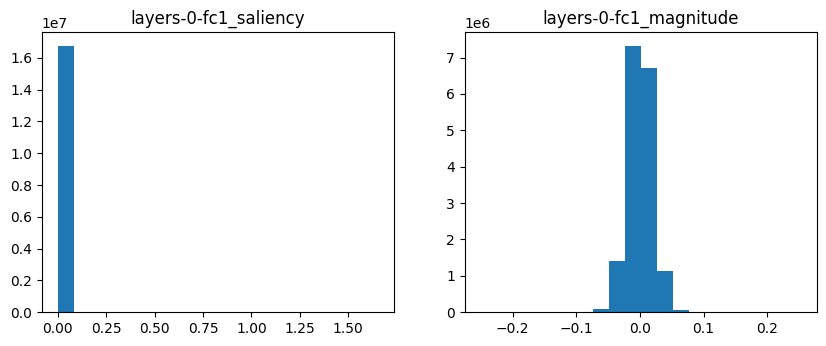

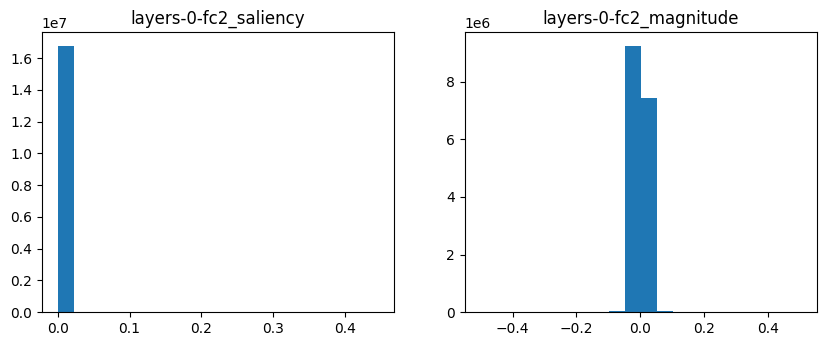

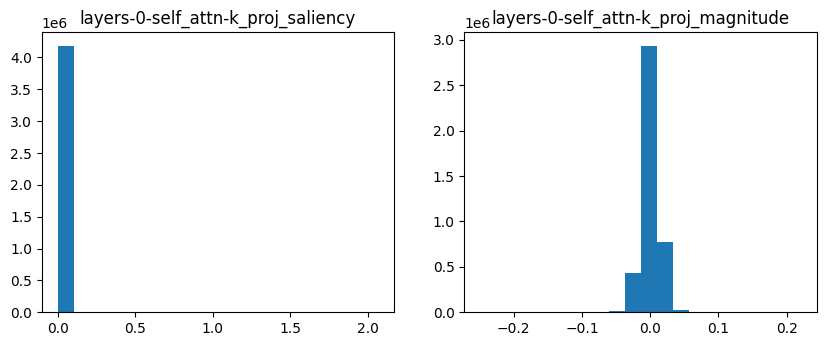

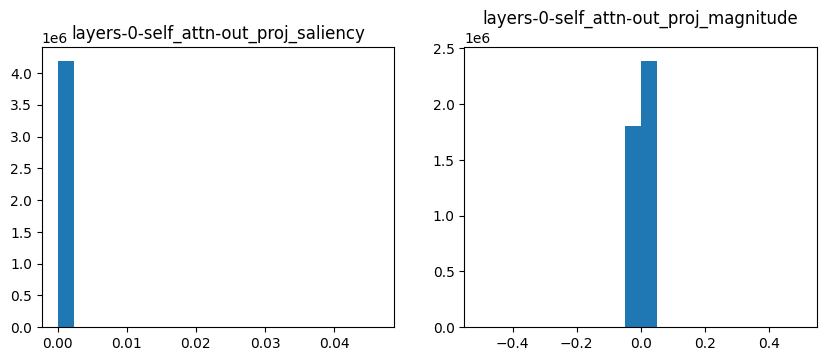

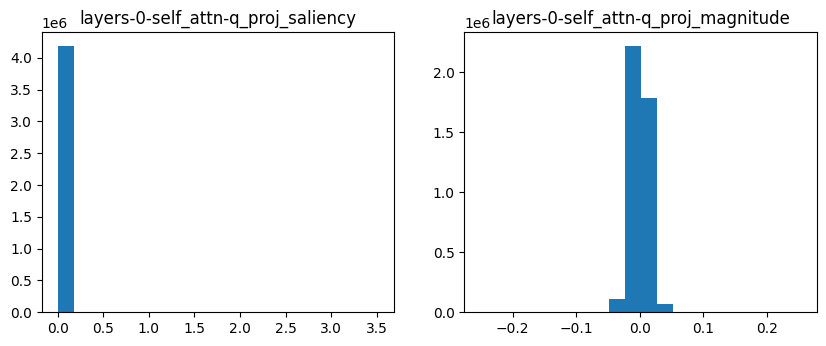

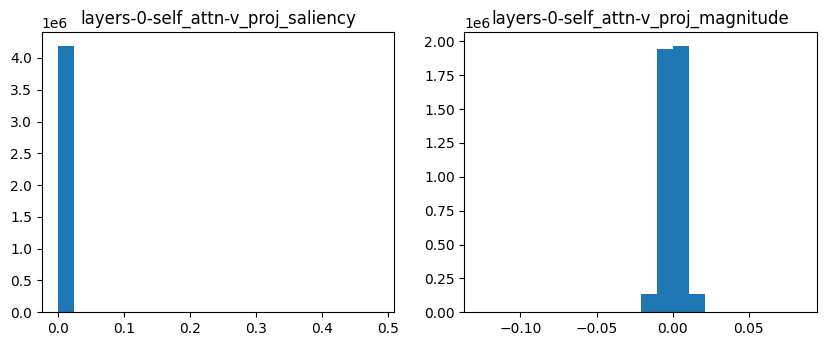

In [28]:
# This is with the outliers *not removed*

layer_saliencies = glob.glob("saliency-opt-1.3b/*saliency")
layer_weights = glob.glob("saliency-opt-1.3b/*weights")

# print(sorted(layer_saliencies)[:6])
# print(sorted(layer_weights)[:6])

for layer_saliency, layer_weight in zip(sorted(layer_saliencies)[:6], sorted(layer_weights)[:6]):
    saliency = torch.load(layer_saliency).cpu().numpy()
    weight = torch.load(layer_weight).cpu().numpy()
    
    layer_name = "-".join(layer_saliency.split(".")[3:-1])

    plt.figure(figsize=(10, 8))
    
    plt.subplot(2,2,1)
    plt.hist(saliency.reshape(-1), bins=20)
    plt.title(os.path.basename(layer_name)+"_saliency")

    plt.subplot(2,2,2)
    plt.hist(weight.reshape(-1), bins=20)
    plt.title(os.path.basename(layer_name)+"_magnitude")
    
    plt.show()

In [2]:
np.seterr(all='raise')

seeds = ["wikitext2", "ptb", "c4"]

diffs = np.zeros((len(seeds), len(seeds)))
sums = np.zeros((len(seeds), len(seeds)))

diffs_mask = np.zeros((len(seeds), len(seeds)))
sums_mask = np.zeros((len(seeds), len(seeds)))

num_layers = len(list((glob.glob(f"saliency-outlier-opt-13b-cali-{seeds[0]}/*weights"))))
outlier_fractions = np.zeros((len(seeds), num_layers))

for i, seed in enumerate(seeds):
    layer_weights = sorted(glob.glob(f"saliency-outlier-opt-13b-cali-{seed}/*weights"))
    layer_outlier_mask = sorted(glob.glob(f"saliency-outlier-opt-13b-cali-{seed}/*mask"))

    for j, layer_mask in enumerate(layer_outlier_mask):
        try:
            mask = torch.load(layer_mask).cpu().numpy()
            outlier_fractions[i,j] = np.sum(mask)/mask.size
        except Exception as e:
            print(str(e))
            print(layer_mask)
            continue

    for j, _seed in enumerate(seeds):
        if seed == _seed:
            continue
        layer_weights_ = sorted(glob.glob(f"saliency-outlier-opt-13b-cali-{_seed}/*weights"))
        layer_outlier_mask_ = sorted(glob.glob(f"saliency-outlier-opt-13b-cali-{_seed}/*mask"))

        diff_sum = 0
        weights_sum = 0

        mask_diff_sum = 0
        mask_sum = 0

        for layer, layer_, layer_mask, layer_mask_ in zip(layer_weights, layer_weights_, layer_outlier_mask, layer_outlier_mask_):
            try:
                weights = torch.load(layer).cpu().numpy()
                weights_ = torch.load(layer_).cpu().numpy()

                mask = torch.load(layer_mask).cpu().numpy().astype(np.int8)
                mask_ = torch.load(layer_mask_).cpu().numpy().astype(np.int8)

                diff_sum += np.sum(np.square(np.abs(weights-weights_)))
                weights_sum += np.sum(np.abs(weights))

                mask_diff_sum += np.sum(np.abs(mask-mask_))
                mask_sum += np.sum(mask)

            except Exception as e:
                print(str(e))
                print(layer, layer_)
                continue
        
        diffs[i,j] = diff_sum
        sums[i,j] = weights_sum

        diffs_mask[i,j] = mask_diff_sum
        sums_mask[i,j] = mask_sum

PytorchStreamReader failed reading zip archive: failed finding central directory
saliency-outlier-opt-13b-cali-wikitext2/model.decoder.layers.33.fc2.weights saliency-outlier-opt-13b-cali-ptb/model.decoder.layers.33.fc2.weights
PytorchStreamReader failed reading zip archive: failed finding central directory
saliency-outlier-opt-13b-cali-wikitext2/model.decoder.layers.5.fc2.weights saliency-outlier-opt-13b-cali-ptb/model.decoder.layers.5.fc2.weights
PytorchStreamReader failed reading zip archive: failed finding central directory
saliency-outlier-opt-13b-cali-wikitext2/model.decoder.layers.8.self_attn.out_proj.weights saliency-outlier-opt-13b-cali-ptb/model.decoder.layers.8.self_attn.out_proj.weights
PytorchStreamReader failed reading zip archive: failed finding central directory
saliency-outlier-opt-13b-cali-ptb/model.decoder.layers.33.fc2.mask
PytorchStreamReader failed reading zip archive: failed finding central directory
saliency-outlier-opt-13b-cali-ptb/model.decoder.layers.5.fc2.mas

In [3]:
# print(outlier_fractions)

print(np.mean(outlier_fractions*100, axis=1), np.std(outlier_fractions*100,axis=1))


for i in range(len(seeds)):
    sums[i,i] = 1
    sums_mask[i,i] = 1


percent = diffs/sums*100
print(percent)

print(np.mean(percent[np.logical_and(percent!=0, np.isfinite(percent))]))
print(np.std(percent[np.logical_and(percent!=0, np.isfinite(percent))]))

mask_percent = diffs_mask/sums_mask*100
print(mask_percent)

print(np.mean(mask_percent[np.logical_and(mask_percent!=0, np.isfinite(mask_percent))]))
print(np.std(mask_percent[np.logical_and(mask_percent!=0, np.isfinite(mask_percent))]))

[0.55096996 0.53379175 0.38618988] [1.40121098 0.78711365 0.59253259]
[[0.         0.07717788 0.06863434]
 [0.07712087 0.         0.0717643 ]
 [0.06851716 0.07169251 0.        ]]
0.07248450944482801
0.003541025108013264
[[  0.         136.43047626  97.55519024]
 [123.96469039   0.          98.58931895]
 [145.10729869 161.97054826   0.        ]]
127.26958713369402
23.53255920043689


In [21]:
class RoundNoGradient(torch.autograd.Function):
	@staticmethod
	def forward(ctx, x):
		return x.round()
	@staticmethod
	def backward(ctx, g):
		return g
		

class MaskNoGradient(torch.autograd.Function):
	@staticmethod
	def forward(ctx, x, Alpha):
		y=x.clone()
		alpha_scalar = int(Alpha.item() - 1.0)
		mask = 0xFFFFFFFF
		mask = mask >> (23 - alpha_scalar)
		mask = mask << (23 - alpha_scalar)
		mask_man = 0x007FFFFF & ~mask
		#act_int = x.data.view(torch.int32) & mask
		rounding = (mask_man + 1) >> 1
		# act_int = x.data.view(torch.int32) & mask + rounding
		act_int = (x.data.view(torch.int32) + rounding) & mask
		y.data = act_int.view(torch.float)
		return y
	@staticmethod
	def backward(ctx, g):
		return g, None

class StoNoGradient(torch.autograd.Function):
	@staticmethod
	def forward(ctx, x):
		y=torch.rand(x.size())
		if x.get_device()!= -1:
			y=y.cuda()
		z=(y<x).float()
		return z
	@staticmethod
	def backward(ctx, g):
		return g


class Quantize_Interpolate(torch.autograd.Function):
	#@staticmethod
	def forward(x, alpha):
		low=torch.tensor(float(torch.floor(alpha)))#.cpu()
		high=low+1.0
		#on=torch.ones(x.size()).cuda()
		low_a=StoNoGradient.apply((high-alpha))#StoNoGradient.apply((high-alpha)*on)
		high_a=1.0-low_a#on-low_a

		#low_a=StoNoGradient.apply((high-alpha)*on)
		#high_a=on-low_a
		if x.get_device() != 0:
			low_a=low_a.cpu()
			high_a=high_a.cpu()
		else: 
			low_a=low_a.cuda()
			high_a=high_a.cuda()
			low=low.cuda()
			high=high.cuda()

		quantized=MaskNoGradient.apply(x,low)*low_a+MaskNoGradient.apply(x,high)*high_a
		
		return quantized#.clone()

class Quantize_Interpolate_BP(torch.autograd.Function):
	@staticmethod
	def forward(ctx, x, alpha):
		low=torch.tensor(float(torch.floor(alpha)))
		high=low+1.0
		low_a=StoNoGradient.apply((high-alpha))
		high_a=1.0-low_a

		if x.get_device() != 0:
			low_a=low_a.cpu()
			high_a=high_a.cpu()
		else: 
			low_a=low_a.cuda()
			high_a=high_a.cuda()
			low=low.cuda()
			high=high.cuda()

		ctx.save_for_backward(low, high, x)

		if low_a:
			quantized=MaskNoGradient.apply(x,low)
		else:
			quantized=MaskNoGradient.apply(x,high)

		# quantized=MaskNoGradient.apply(x,low)*low_a + MaskNoGradient.apply(x,high)*high_a
		return quantized

	@staticmethod
	def backward(ctx, g_in):
		low, high, x = ctx.saved_tensors

		# For alpha gradient, since
		# quantized=MaskNoGradient.apply(x,low)*low_a+quantized=MaskNoGradient.apply(x,high)*(1-low_a)
		# low_a=StoNoGradient.apply((high-alpha))
		# d_q/d_low_a = Q(x, n) - Q(x, n+1)
		# d_low_a/d_alpha = -1
		# => d_q/d_alpha = Q(x, n+1) - Q(x, n)
		dqda = torch.sum((MaskNoGradient.apply(x,high) - MaskNoGradient.apply(x,low))*g_in).view(-1)

		# if low_a:
		# 	dqda = torch.sum((x - MaskNoGradient.apply(x,low))*g_in).view(-1)
		# else:
		# 	dqda = torch.sum((MaskNoGradient.apply(x,high))*g_in - x).view(-1)

		# x gradient is just 1, straight through estimator
		return g_in, dqda

In [57]:
np.random.seed(42)
torch.random.manual_seed(42)

x1 = torch.rand(3,4, requires_grad=True)
a1 = torch.nn.Parameter(torch.FloatTensor([4.6]),requires_grad=True)


l = torch.nn.Linear(4, 5)
target = torch.rand(3,5)
loss = torch.nn.MSELoss()

x1

tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]], requires_grad=True)

In [58]:
out = []

print(a1.grad)

for _ in range(10):
    y = Quantize_Interpolate.forward(x1, a1)
    # y = Quantize_Interpolate_BP.apply(x1, a1)
    y = l(y)
    out.append(loss(y, target))

for i in range(10):
    out[i].backward()
    print(a1.grad, x1.grad)


# print(out1[:2])


None
tensor([-0.0060]) tensor([[ 0.0676,  0.1021, -0.0216,  0.0792],
        [ 0.0080,  0.0972, -0.0259,  0.0445],
        [ 0.0324,  0.0201,  0.0440, -0.0167]])
tensor([-0.0119]) tensor([[ 0.1351,  0.2036, -0.0427,  0.1584],
        [ 0.0163,  0.1923, -0.0496,  0.0863],
        [ 0.0648,  0.0410,  0.0870, -0.0320]])
tensor([-0.0177]) tensor([[ 0.2026,  0.3051, -0.0639,  0.2376],
        [ 0.0245,  0.2874, -0.0734,  0.1282],
        [ 0.0972,  0.0619,  0.1301, -0.0473]])
tensor([-0.0235]) tensor([[ 0.2700,  0.4066, -0.0850,  0.3169],
        [ 0.0328,  0.3825, -0.0972,  0.1700],
        [ 0.1296,  0.0828,  0.1731, -0.0626]])
tensor([-0.0293]) tensor([[ 0.3375,  0.5081, -0.1062,  0.3961],
        [ 0.0411,  0.4776, -0.1210,  0.2118],
        [ 0.1620,  0.1037,  0.2162, -0.0778]])
tensor([-0.0351]) tensor([[ 0.4050,  0.6096, -0.1273,  0.4753],
        [ 0.0493,  0.5727, -0.1447,  0.2536],
        [ 0.1944,  0.1246,  0.2592, -0.0931]])
tensor([-0.0409]) tensor([[ 0.4725,  0.7111, -0.1484,

In [13]:
np.concatenate(np.split(np.arange(0, 10), 2))

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [28]:
np.seterr(all='raise')

seeds = ["wikitext2", "ptb", "c4"]

num_layers = len(list((glob.glob(f"saliency-outlier-opt-6.7b-cali-{seeds[0]}/*saliency_wo_outliers"))))
diffs = np.zeros((len(seeds), len(seeds), num_layers))
diffs_p_value = np.zeros((len(seeds), len(seeds), num_layers))

n_chunks = 16

for i, seed in enumerate(seeds):
    layer_saliencies = sorted(glob.glob(f"saliency-outlier-opt-6.7b-cali-{seed}/*saliency_wo_outliers"))

    for j, _seed in enumerate(seeds):
        if seed == _seed:
            continue
        layer_saliencies_ = sorted(glob.glob(f"saliency-outlier-opt-6.7b-cali-{_seed}/*saliency_wo_outliers"))

        for k, (layer, layer_) in enumerate(zip(layer_saliencies, layer_saliencies_)):
            try:
                # if "fc2" in layer or "out_proj" in layer:
                #     #  per col
                #     saliency = np.mean(torch.load(layer).cpu().numpy(), axis=0)
                #     saliency_ = np.mean(torch.load(layer_).cpu().numpy(), axis=0)
                # else:
                #     #  per row
                #     saliency = np.mean(torch.load(layer).cpu().numpy(), axis=1)
                #     saliency_ = np.mean(torch.load(layer_).cpu().numpy(), axis=1)

                saliency = np.mean(torch.load(layer).cpu().numpy(), axis=1)
                saliency_ = np.mean(torch.load(layer_).cpu().numpy(), axis=1)
                
                saliency_order = np.split(np.argsort(saliency), n_chunks)
                saliency_order_ = np.split(np.argsort(saliency_), n_chunks)

                saliency_order = np.concatenate([np.sort(l) for l in saliency_order])
                saliency_order_ = np.concatenate([np.sort(l) for l in saliency_order_])

                k_tau_distance = stats.kendalltau(saliency_order, saliency_order_)
                diffs[i,j,k] = k_tau_distance.statistic
                diffs_p_value[i,j,k] = k_tau_distance.pvalue

            except Exception as e:
                print(str(e))
                print(layer, layer_)
                continue
        

In [29]:
print(np.mean(diffs, axis=2))
print(np.mean(diffs_p_value, axis=2))

[[0.         0.94312882 0.94546878]
 [0.94312882 0.         0.94263465]
 [0.94546878 0.94263465 0.        ]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


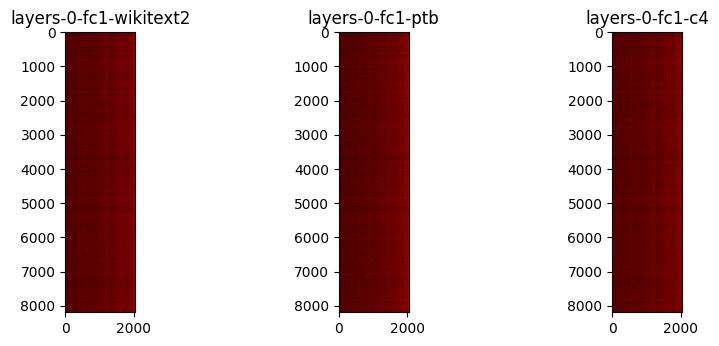

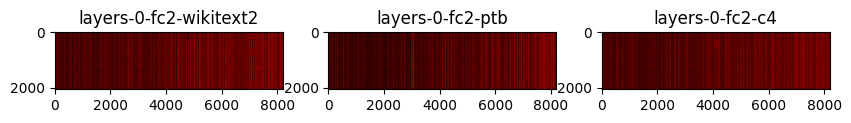

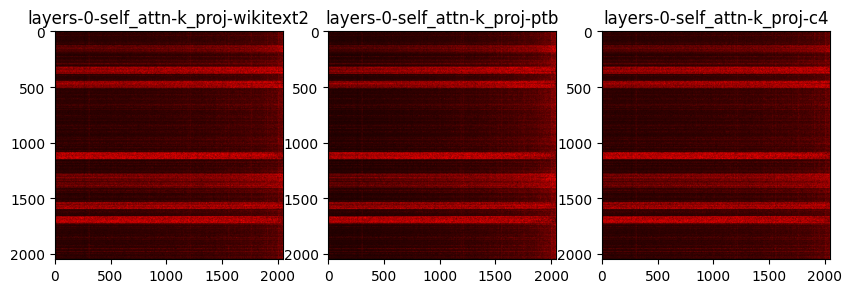

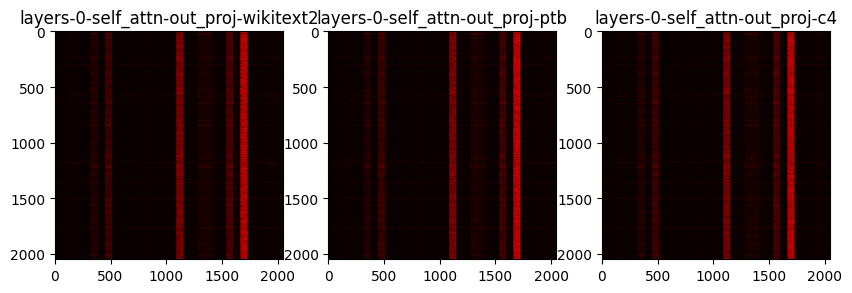

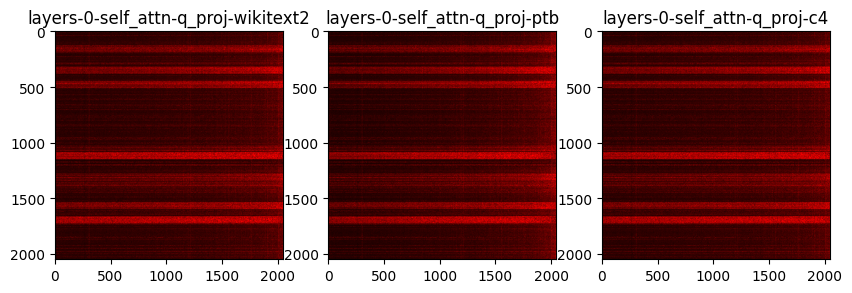

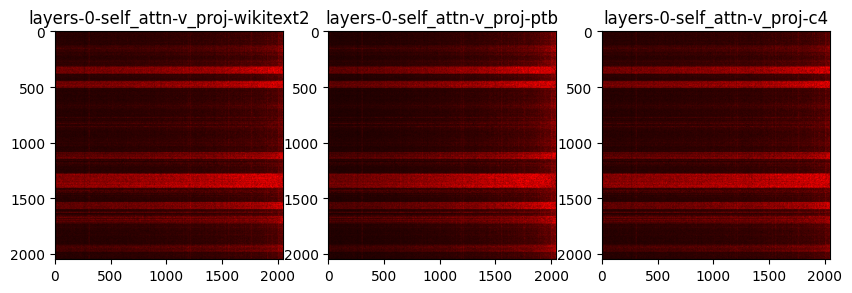

In [7]:
seeds = ["wikitext2", "ptb", "c4"]

layer_saliencies = [sorted(glob.glob(f"saliency-outlier-opt-6.7b-cali-{seed}/*saliency_wo_outliers"))[:6] for seed in seeds]

for l1,l2,l3 in zip(*layer_saliencies):

    s1 = torch.load(l1).cpu().numpy()
    s2 = torch.load(l2).cpu().numpy()
    s3 = torch.load(l3).cpu().numpy()
    
    layer_name = "-".join(l1.split(".")[3:-1])

    plt.figure(figsize=(10, 8))

    plt.subplot(2,3,1)
    plt.imshow(s1/np.max(s1), cmap='hot')
    plt.title(os.path.basename(layer_name)+ "-" + seeds[0])

    plt.subplot(2,3,2)
    plt.imshow(s2/np.max(s2), cmap='hot')
    plt.title(os.path.basename(layer_name)+ "-" + seeds[1])
    
    plt.subplot(2,3,3)
    plt.imshow(s3/np.max(s3), cmap='hot')
    plt.title(os.path.basename(layer_name)+ "-" + seeds[2])
    
    plt.show()